In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Data =pd.read_csv("insurance.csv")

In [3]:
## Read the data as a data frame 
df= pd.DataFrame(Data)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# Shape of the data   
Data.shape

(1338, 7)

In [6]:
# Data type of each attribute 
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# Checking the presence of missing values
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

There is no missing values in any column 

In [7]:
#  5 point summary of numerical attributes (Min,Max,25%,50%,75%)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Text(0.5, 1.0, 'Charges Distribution')

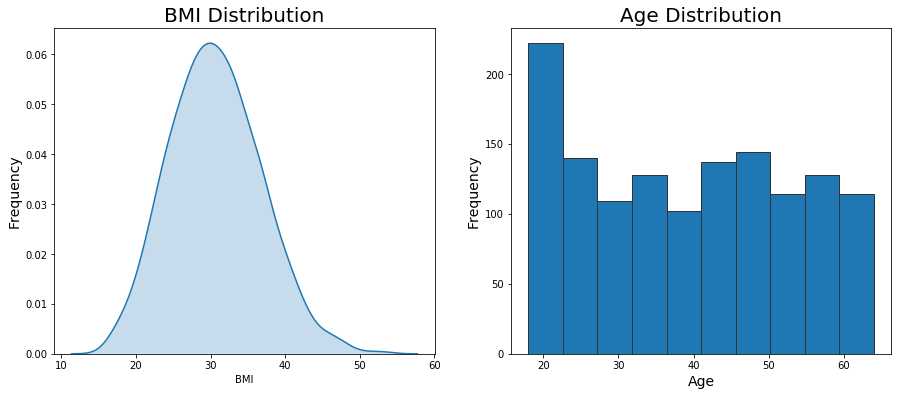

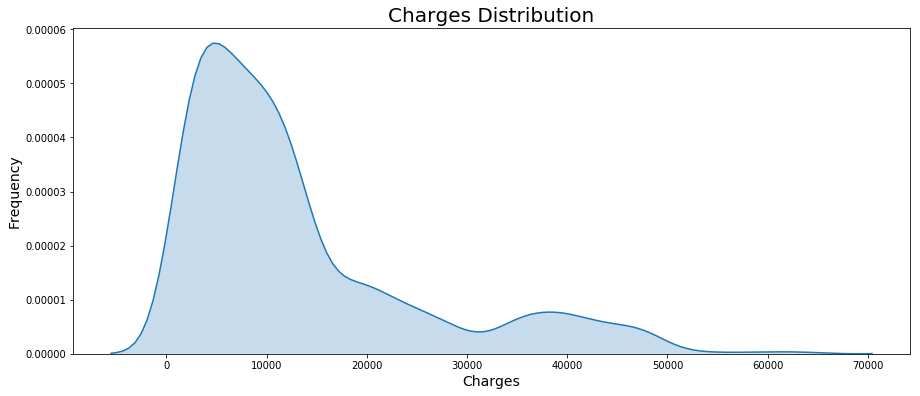

In [8]:
# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
fig21, (ax21,ax22) = plt.subplots(1,2)
fig21.set_size_inches(15,6)

# histogram of the BMI distribution
sns.kdeplot(Data['bmi'], ax=ax21, shade=True, legend=False)
ax21.set_xlabel("BMI")
ax21.set_ylabel("Frequency", fontsize=14)
ax21.set_title("BMI Distribution", fontsize=20)

#Histogram of the age distribution
ax22.hist('age', data=Data, bins=10, edgecolor='0.2')
ax22.set_xlabel("Age", fontsize=14)
ax22.set_ylabel("Frequency", fontsize=14)
ax22.set_title("Age Distribution", fontsize=20)

#Subplot for the charges distribution

fig22, ax23 = plt.subplots()
fig22.set_size_inches(15,6)

#Density plot of charges distribution
sns.kdeplot(Data['charges'], ax=ax23, shade=True, legend=False)
ax23.set_xlabel("Charges", fontsize=14)
ax23.set_ylabel("Frequency", fontsize=14)
ax23.set_title("Charges Distribution", fontsize=20)


In [9]:
#Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns  
print("Skewness of bmi: %f" % Data['bmi'].skew())
print("Skewness of age: %f" % Data['age'].skew())
print("Skewness of charges: %f" % Data['charges'].skew())

Skewness of bmi: 0.284047
Skewness of age: 0.055673
Skewness of charges: 1.515880


As the skewness of bmi and age is less tahn 0.5 means the distribution of bmi and age are approximately symmetric.
Skewness of charges is equals to 1 means  the distribution is highly skewed, which is right skewed.

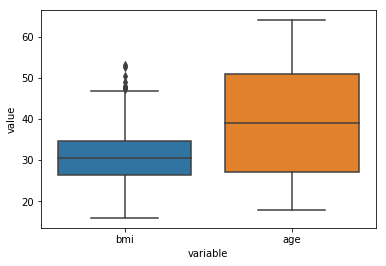

In [10]:
#Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges' columns  
import matplotlib.pyplot as plt
import seaborn as sns
#boxplot=sns.boxplot(y= df['bmi'])
df_box= pd.DataFrame(data = Data, columns = ['bmi','age'])

sns.boxplot(x="variable", y="value", data=pd.melt(df_box))

plt.show()


outliers are present in bmi

no outlier in age 

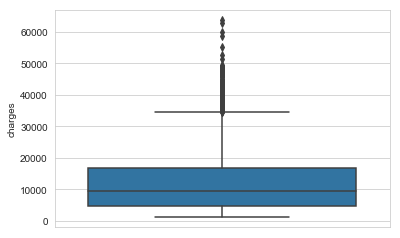

In [11]:
sns.set_style("whitegrid") 
sns.boxplot(y= Data["charges"])


Outlier present in charges attribute 

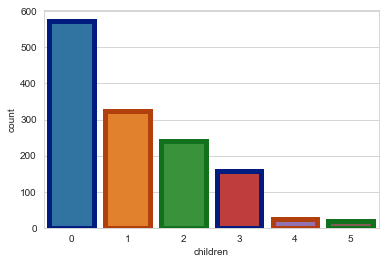

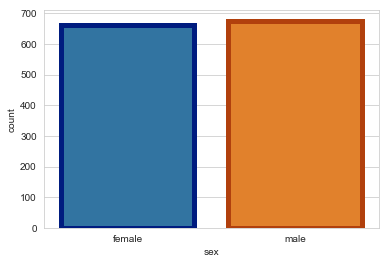

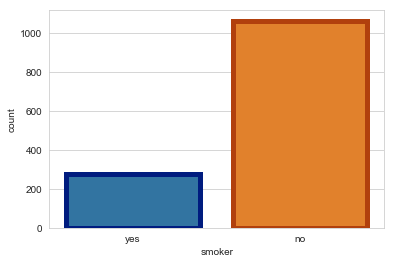

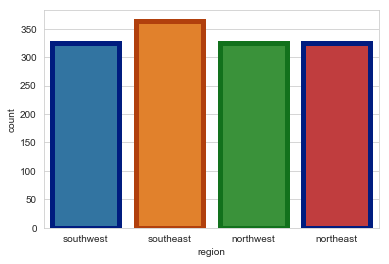

In [15]:
#Distribution of categorical columns (include  children)  
df1 = df.astype({"children":'category'})
sns.countplot(x="children", data=df,linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.show()
df2 = df.astype({"sex":'category'})
sns.countplot(x="sex", data=df,linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.show()
df3 = df.astype({"smoker":'category'})
sns.countplot(x="smoker", data=df,linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.show()
df2 = df.astype({"region":'category'})
sns.countplot(x="region", data=df,linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.show()

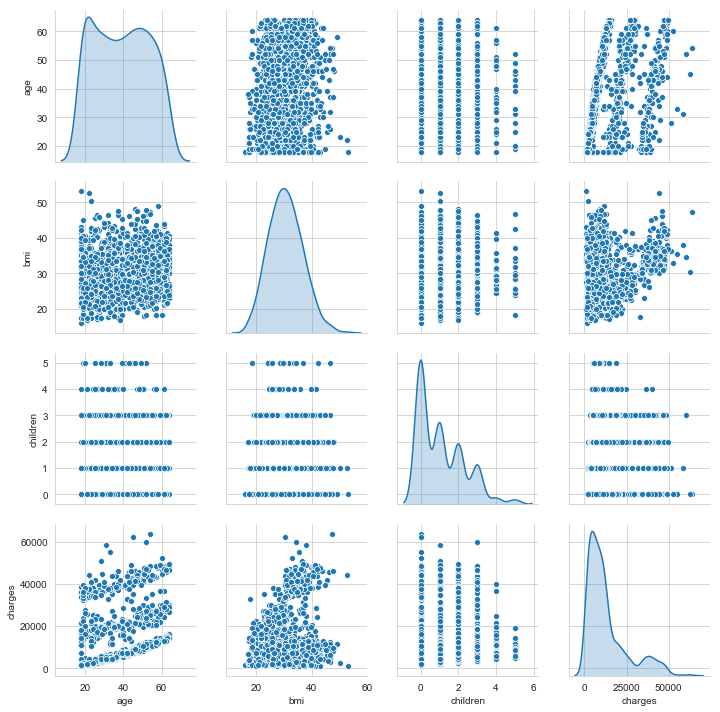

In [16]:
#Pair plot that includes all the columns of the data  frame
Health_df_attr = df.iloc[ : , 0:7]
sns.pairplot(Health_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(Health_df_attr)  # to plot histogram

# Do charges of people who smoke differ significantly  from the people who don't

In [17]:
#Do charges of people who smoke differ significantly  from the people who don't
df1=df[df['charges'].notnull() & (df['smoker'] == "no")]
Charges_Nonsmoker=df1['charges']
#print(Charges_Nonsmoker)

In [18]:
df2=df[df['charges'].notnull() & (df['smoker'] == "yes")]
Charges_smoker=df2['charges']
#print(Charges_smoker)

In [19]:

charges_df=pd.DataFrame({"Charges_smoker":Charges_smoker,
                         "Charges_Nonsmoker":Charges_Nonsmoker})
charges_df.describe()


#frames=[Charges_smoker.describe(),Charges_Nonsmoker.describe()]
#result=pd.concat(frames,axis=1)
#print(result)

,Charges_smoker,Charges_Nonsmoker
count,274.000000,1064.000000
mean,32050.231832,8434.268298
std,11541.547176,5993.781819
min,12829.455100,1121.873900
25%,20826.244213,3986.438700
50%,34456.348450,7345.405300
75%,41019.207275,11362.887050
max,63770.428010,36910.608030


std of smokers is more than double of that of non-smoker. Hence while non-smokers seem to have their medical charges varying little about the mean, in other words, their medical health seems to be, more or less, similar. Non-smokers, on the other hand, vary a lot around the mean, which indicates that their bodies respond differently to smoking (e.g. some may develop lung cancer while others won't)

We now run a 2-tailed t-test to test whether the difference we see above in the smoking categeory could be due to chance, in other words, due to sampling error (H0) or is it a real difference (H1)

Null hypothesis H0: μ1 - μ2 = 0
Alternate hypothesis : μ1 - μ2 ≠ 0

In [21]:
#loc1=Charges_Nonsmoker.mean()
#scale1=Charges_Nonsmoker.std()
rvs1=stats.norm.rvs(loc=Charges_Nonsmoker.mean(),scale=Charges_Nonsmoker.std(),size=Charges_Nonsmoker.count())
rvs2=stats.norm.rvs(loc=Charges_smoker.mean(),scale=Charges_smoker.std(),size=Charges_smoker.count())
stats.ttest_ind(a=rvs2,b=rvs1,equal_var=False)


Ttest_indResult(statistic=33.39990471693711, pvalue=4.319221932451096e-105)

The value of t is very big, as expected, = 34, and the p-value is basically 0, hence for alpha = 0.05 we reject the null hypothesis H0 and we accept H1; that what we are seeing cannot be generated by mistake.we are 95% confident that the difference between the charges of smokers and non-smokers is always more, and never less.

# Does bmi of males differ significantly from that of  females

Null hypothesis H0 :  μ1 - 𝜇2 = 0
Alternate hypothesis H1 : 𝜇1 - μ2 ≠ 0

In [22]:
females= df[df["sex"]== 'female']
males= df[df["sex"]== 'male']

In [24]:
n1 = len(females)
mu1= females["bmi"].mean()
sd1 = females["bmi"].std()
(n1,mu1,sd1)

(662, 30.377749244713023, 6.046023085745338)

In [25]:
n2 = len(males)
mu2 = males["bmi"].mean()
sd2 = males["bmi"].std()
(n2,mu2,sd2)

(676, 30.943128698224832, 6.140434615792248)

In [26]:
import statsmodels.stats.weightstats 
#sm.stats.ztest(females["bmi"],males["bmi"])
statsmodels.stats.weightstats.ztest(females["bmi"],males["bmi"])

(-1.6967526357522242, 0.08974343679943912)

As p-value = 0.089 which is much greater than significance level. so we cant reject null hypothesis means bmi of males not significantly different from females

# Is the proportion of smokers significantly different  in different genders

Null hypothesis H0 :  μ1 = 𝜇2 
Alternate hypothesis H1 : 𝜇1  ≠ μ2

In [27]:
count = pd.crosstab(df["sex"],df["smoker"])
print(count)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(count)
print("   Chi2 Stat    ",chi2_stat)
print("   p value      ",p_val)
print("   Degrees of Freedom     ",dof)
print("   Contingency Table   ",ex)


smoker   no  yes
sex             
female  547  115
male    517  159
   Chi2 Stat     7.39291081459996
   p value       0.006548143503580696
   Degrees of Freedom      1
   Contingency Table    [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


The p-value = 0.0065 < 0.05 (level of significance) means null is rejected. hence there is significant difference in male and female smoker

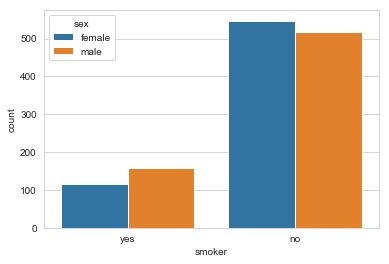

In [28]:
sns.countplot(x="smoker",hue="sex",data=df)

# Is the distribution of bmi across women with no  children, one child and two children, the same 

null hypothesis (H0) is that there is no difference between the groups and equality between means. 
The alternative hypothesis (H1) is that there is a difference between the means and groups. 

In [34]:
Dict = {'male':1,'female':2}
df.sex=[Dict[item] for item in df.sex]
df.head()

KeyError: None

In [48]:
e1=df[df['bmi'].notnull() & (df['sex']== 2) & (df['children'] ==0)]
e2=df[df['bmi'].notnull() & (df['sex']== 2) & (df['children'] ==1)]
e3=df[df['bmi'].notnull() & (df['sex']== 2) & (df['children'] ==2)]
F, p = stats.f_oneway(e1, e2, e3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p))

KeyError: 1